In [1]:
#import libraries for pre-processing
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline #show plots in Jupyter Notebook browser

UsageError: unrecognized arguments: #show plots in Jupyter Notebook browser


In [2]:
pd.set_option('display.max_rows', 25)

In [6]:
#PREPROCESSING

In [3]:
data_train=pd.read_csv('train_data.csv')
data_test=pd.read_csv('test_data.csv')

In [4]:
data_train.info()
print('-' * 40)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  382154 non-null  int64  
 1   Gender              350386 non-null  object 
 2   Umur                285896 non-null  float64
 3   Izin_Mengemudi      305507 non-null  float64
 4   Kode_Wilayah        298080 non-null  float64
 5   Tanggal_Asuransi    304070 non-null  object 
 6   Tahun_Kendaraan     315714 non-null  object 
 7   Biaya               255617 non-null  float64
 8   Sourcing_Channel    298509 non-null  float64
 9   Hari_Diasuransikan  306488 non-null  float64
 10  Target              382154 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 32.1+ MB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78273 entries, 0 to 78272
Data columns (total 10 columns):
 #   Column              N

# TRAIN DATA

In [5]:
data_train.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
0,58609,Pria,65.0,1.0,48.0,11/4/2018,NaN,2630.0,15.0,131.0,0
1,208222,Wanita,22.0,1.0,21.0,2/2/2018,<1 Tahun,NaN,NaN,NaN,0
2,345428,Wanita,24.0,1.0,NaN,5/12/2019,<1 Tahun,NaN,NaN,181.0,0
3,236831,Pria,58.0,1.0,46.0,NaN,1-2 Tahun,NaN,124.0,NaN,0
4,280181,Pria,NaN,1.0,36.0,11/19/2019,>2 Tahun,NaN,NaN,NaN,1


In [117]:
ab=data_train.corr()
ab
plt.figure(figsize=(15,8))
sns.heatmap(ab,annot=True,cmap='magma')

,id,Umur,Izin_Mengemudi,Kode_Wilayah,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
id,1.000000,-0.030535,0.004737,0.002989,0.014813,-0.007446,-0.001546,0.166621
Umur,-0.030535,1.000000,-0.064958,0.046956,0.079891,-0.579095,0.001308,0.146179
Izin_Mengemudi,0.004737,-0.064958,1.000000,-0.000666,-0.009791,0.031058,0.002460,0.011128
Kode_Wilayah,0.002989,0.046956,-0.000666,1.000000,-0.012957,-0.045872,0.000146,0.012632
Biaya,0.014813,0.079891,-0.009791,-0.012957,1.000000,-0.143558,-0.002264,0.026168
Sourcing_Channel,-0.007446,-0.579095,0.031058,-0.045872,-0.143558,1.000000,-0.001380,-0.222263
Hari_Diasuransikan,-0.001546,0.001308,0.002460,0.000146,-0.002264,-0.001380,1.000000,-0.001052
Target,0.166621,0.146179,0.011128,0.012632,0.026168,-0.222263,-0.001052,1.000000


In [88]:
plt.figure(figsize=(15,8))
sns.heatmap(ab,annot=True,cmap='magma')

NameError: name 'ab' is not defined

<Figure size 1080x576 with 0 Axes>

In [13]:
data_test.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan
0,273737,NaN,NaN,1.0,11.0,NaN,NaN,NaN,NaN,193.0
1,49175,Pria,25.0,1.0,30.0,4/14/2018,<1 Tahun,NaN,152.0,153.0
2,353494,Wanita,50.0,1.0,19.0,12/25/2019,NaN,31641.0,124.0,278.0
3,182676,Wanita,59.0,NaN,NaN,5/4/2018,1-2 Tahun,2630.0,26.0,202.0
4,498206,Wanita,57.0,NaN,28.0,4/17/2019,1-2 Tahun,26357.0,122.0,142.0


In [6]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
train_missing= missing_values_table(data_train)
train_missing

Your selected dataframe has 11 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
Biaya,126537,33.1
Umur,96258,25.2
Kode_Wilayah,84074,22.0
Sourcing_Channel,83645,21.9
Tanggal_Asuransi,78084,20.4
Izin_Mengemudi,76647,20.1
Hari_Diasuransikan,75666,19.8
Tahun_Kendaraan,66440,17.4
Gender,31768,8.3


In [16]:
data_train.columns

Index(['id', 'Gender', 'Umur', 'Izin_Mengemudi', 'Kode_Wilayah',
       'Tanggal_Asuransi', 'Tahun_Kendaraan', 'Biaya', 'Sourcing_Channel',
       'Hari_Diasuransikan', 'Target'],
      dtype='object')

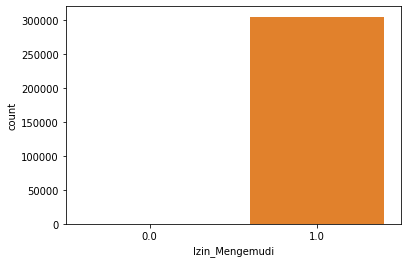

In [9]:
sns.countplot(x='Izin_Mengemudi',data=data_train)

In [7]:
data_train['Target'].value_counts()

0    319553
1     62601
Name: Target, dtype: int64

In [8]:
data_train['Gender'] = data_train['Gender'].fillna('Pria')

In [9]:
data_train['Umur'] = data_train['Umur'].fillna(data_train['Umur'].mean())

In [10]:
data_train['Kode_Wilayah'] = data_train['Kode_Wilayah'].fillna(0)

In [11]:
data_train['Sourcing_Channel'] = data_train['Sourcing_Channel'].fillna(0)

In [12]:
data_train['Tanggal_Asuransi'] = data_train['Tanggal_Asuransi'].fillna('0/0/0')

In [13]:
data_train['Izin_Mengemudi'] = data_train['Izin_Mengemudi'].fillna(1.0)

In [14]:
data_train['Hari_Diasuransikan'] = data_train['Hari_Diasuransikan'].fillna(0)

In [15]:
data_train['Tahun_Kendaraan'] = data_train['Tahun_Kendaraan'].fillna(0)

In [16]:
data_train['Biaya'] = data_train['Biaya'].fillna(data_train['Biaya'].mean())

In [17]:
data_train.isnull().sum()

id                    0
Gender                0
Umur                  0
Izin_Mengemudi        0
Kode_Wilayah          0
Tanggal_Asuransi      0
Tahun_Kendaraan       0
Biaya                 0
Sourcing_Channel      0
Hari_Diasuransikan    0
Target                0
dtype: int64

In [18]:
data_train.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
0,58609,Pria,65.000000,1.0,48.0,11/4/2018,0,2630.000000,15.0,131.0,0
1,208222,Wanita,22.000000,1.0,21.0,2/2/2018,<1 Tahun,31183.756781,0.0,0.0,0
2,345428,Wanita,24.000000,1.0,0.0,5/12/2019,<1 Tahun,31183.756781,0.0,181.0,0
3,236831,Pria,58.000000,1.0,46.0,0/0/0,1-2 Tahun,31183.756781,124.0,0.0,0
4,280181,Pria,38.916592,1.0,36.0,11/19/2019,>2 Tahun,31183.756781,0.0,0.0,1


In [19]:
n_gender=data_train[['Gender']]
n_gender=pd.get_dummies(n_gender,drop_first=True)
n_gender.head()

,Gender_Wanita
0,0
1,1
2,1
3,0
4,0


,Umur_range_Adult 2,Umur_range_Adult 3,Umur_range_Elderly
0,0,0,1
1,0,0,0
2,0,0,0
3,0,1,0
4,1,0,0


In [20]:
data_train['Tahun_Kendaraan'].unique()

array([0, '<1 Tahun', '1-2 Tahun', '>2 Tahun'], dtype=object)

In [21]:
col         = 'Tahun_Kendaraan'
conditions  = [ data_train[col] == '1-2 Tahun', data_train[col] == '<1 Tahun', data_train[col] == '>2 Tahun' ]
choices     = [ 2, 1, 3 ]
    
data_train["tahun_kendaraan"] = np.select(conditions, choices, default=0)

In [22]:
data_train.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target,tahun_kendaraan
0,58609,Pria,65.000000,1.0,48.0,11/4/2018,0,2630.000000,15.0,131.0,0,0
1,208222,Wanita,22.000000,1.0,21.0,2/2/2018,<1 Tahun,31183.756781,0.0,0.0,0,1
2,345428,Wanita,24.000000,1.0,0.0,5/12/2019,<1 Tahun,31183.756781,0.0,181.0,0,1
3,236831,Pria,58.000000,1.0,46.0,0/0/0,1-2 Tahun,31183.756781,124.0,0.0,0,2
4,280181,Pria,38.916592,1.0,36.0,11/19/2019,>2 Tahun,31183.756781,0.0,0.0,1,3


In [23]:
data_train['Tanggal_Asuransi'].iloc[0].split('/')[2]

'2018'

In [24]:
data_train['tanggal'] = data_train['Tanggal_Asuransi'].apply(lambda x:x.split('/')[1])

In [25]:
data_train['bulan'] = data_train['Tanggal_Asuransi'].apply(lambda x:x.split('/')[0])

In [26]:
data_train['tahun'] = data_train['Tanggal_Asuransi'].apply(lambda x:x.split('/')[2])

In [27]:
data_train['tanggal']=data_train['tanggal'].apply(int)

In [28]:
data_train['bulan']=data_train['bulan'].apply(int)

In [29]:
data_train['tahun']=data_train['tahun'].apply(int)

In [30]:
data_train.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target,tahun_kendaraan,tanggal,bulan,tahun
0,58609,Pria,65.000000,1.0,48.0,11/4/2018,0,2630.000000,15.0,131.0,0,0,4,11,2018
1,208222,Wanita,22.000000,1.0,21.0,2/2/2018,<1 Tahun,31183.756781,0.0,0.0,0,1,2,2,2018
2,345428,Wanita,24.000000,1.0,0.0,5/12/2019,<1 Tahun,31183.756781,0.0,181.0,0,1,12,5,2019
3,236831,Pria,58.000000,1.0,46.0,0/0/0,1-2 Tahun,31183.756781,124.0,0.0,0,2,0,0,0
4,280181,Pria,38.916592,1.0,36.0,11/19/2019,>2 Tahun,31183.756781,0.0,0.0,1,3,19,11,2019


In [115]:
aw=data_train.corr()
aw

,id,Umur,Izin_Mengemudi,Kode_Wilayah,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target,tahun_kendaraan,tanggal,bulan,tahun
id,1.000000,-0.026307,0.004154,0.001421,0.012080,-0.016900,-0.000369,0.166621,-0.006136,0.024608,0.019696,0.045671
Umur,-0.026307,1.000000,-0.055928,0.026029,0.056324,-0.371842,0.000104,0.117283,0.296471,-0.069346,-0.043961,-0.117188
Izin_Mengemudi,0.004154,-0.055928,1.000000,0.000906,-0.007025,0.014180,0.000757,0.009952,-0.009371,0.003646,-0.001249,0.005488
Kode_Wilayah,0.001421,0.026029,0.000906,1.000000,-0.005162,-0.020518,-0.001515,0.008645,0.016497,-0.003793,-0.003739,-0.007653
Biaya,0.012080,0.056324,-0.007025,-0.005162,1.000000,-0.092225,-0.001877,0.021888,0.024676,0.000821,0.000706,0.002319
Sourcing_Channel,-0.016900,-0.371842,0.014180,-0.020518,-0.092225,1.000000,0.000187,-0.224623,-0.250008,0.074135,0.049419,0.127501
Hari_Diasuransikan,-0.000369,0.000104,0.000757,-0.001515,-0.001877,0.000187,1.000000,-0.000528,0.002339,0.001599,0.002190,0.000739
Target,0.166621,0.117283,0.009952,0.008645,0.021888,-0.224623,-0.000528,1.000000,0.156254,-0.126126,-0.084283,-0.215662
tahun_kendaraan,-0.006136,0.296471,-0.009371,0.016497,0.024676,-0.250008,0.002339,0.156254,1.000000,-0.066688,-0.045474,-0.114815
tanggal,0.024608,-0.069346,0.003646,-0.003793,0.000821,0.074135,0.001599,-0.126126,-0.066688,1.000000,0.388718,0.627778


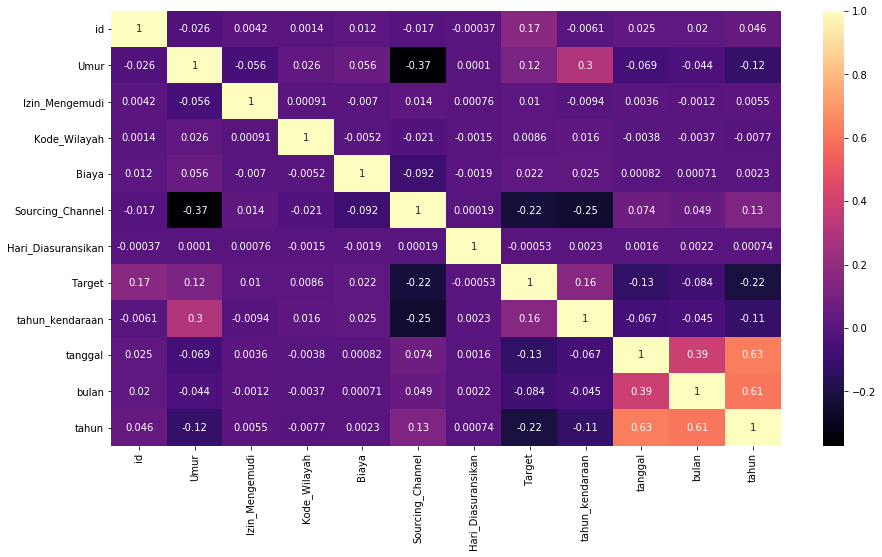

In [116]:
plt.figure(figsize=(15,8))
sns.heatmap(aw,annot=True,cmap='magma')

In [31]:
data_train.drop(data_train.columns[5],axis=1,inplace=True)

In [32]:
data_train.drop(data_train.columns[5],axis=1,inplace=True)

In [33]:
final_train = pd.concat([data_train,n_gender], axis=1)
final_train.drop(['Gender'], axis=1, inplace=True)
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  382154 non-null  int64  
 1   Umur                382154 non-null  float64
 2   Izin_Mengemudi      382154 non-null  float64
 3   Kode_Wilayah        382154 non-null  float64
 4   Biaya               382154 non-null  float64
 5   Sourcing_Channel    382154 non-null  float64
 6   Hari_Diasuransikan  382154 non-null  float64
 7   Target              382154 non-null  int64  
 8   tahun_kendaraan     382154 non-null  int32  
 9   tanggal             382154 non-null  int64  
 10  bulan               382154 non-null  int64  
 11  tahun               382154 non-null  int64  
 12  Gender_Wanita       382154 non-null  uint8  
dtypes: float64(6), int32(1), int64(5), uint8(1)
memory usage: 33.9 MB


In [34]:
final_train.head()

,id,Umur,Izin_Mengemudi,Kode_Wilayah,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target,tahun_kendaraan,tanggal,bulan,tahun,Gender_Wanita
0,58609,65.000000,1.0,48.0,2630.000000,15.0,131.0,0,0,4,11,2018,0
1,208222,22.000000,1.0,21.0,31183.756781,0.0,0.0,0,1,2,2,2018,1
2,345428,24.000000,1.0,0.0,31183.756781,0.0,181.0,0,1,12,5,2019,1
3,236831,58.000000,1.0,46.0,31183.756781,124.0,0.0,0,2,0,0,0,0
4,280181,38.916592,1.0,36.0,31183.756781,0.0,0.0,1,3,19,11,2019,0


# TEST DATA

In [35]:
data_test.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan
0,273737,NaN,NaN,1.0,11.0,NaN,NaN,NaN,NaN,193.0
1,49175,Pria,25.0,1.0,30.0,4/14/2018,<1 Tahun,NaN,152.0,153.0
2,353494,Wanita,50.0,1.0,19.0,12/25/2019,NaN,31641.0,124.0,278.0
3,182676,Wanita,59.0,NaN,NaN,5/4/2018,1-2 Tahun,2630.0,26.0,202.0
4,498206,Wanita,57.0,NaN,28.0,4/17/2019,1-2 Tahun,26357.0,122.0,142.0


In [36]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [37]:
train_missing= missing_values_table(data_test)
train_missing

Your selected dataframe has 10 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
Biaya,20847,26.6
Kode_Wilayah,19553,25.0
Hari_Diasuransikan,17220,22.0
Izin_Mengemudi,15713,20.1
Umur,15581,19.9
Tahun_Kendaraan,13551,17.3
Sourcing_Channel,13239,16.9
Tanggal_Asuransi,11252,14.4
Gender,7578,9.7


In [38]:
data_test['Gender'] = data_test['Gender'].fillna('Pria')

In [39]:
data_test['Umur'] = data_test['Umur'].fillna(data_test['Umur'].mean())

In [40]:
data_test['Kode_Wilayah'] = data_test['Kode_Wilayah'].fillna(0)

In [41]:
data_test['Sourcing_Channel'] = data_test['Sourcing_Channel'].fillna(0)

In [42]:
data_test['Tanggal_Asuransi'] = data_test['Tanggal_Asuransi'].fillna('0/0/0')

In [43]:
data_test['Izin_Mengemudi'] = data_test['Izin_Mengemudi'].fillna(1.0)

In [44]:
data_test['Hari_Diasuransikan'] = data_test['Hari_Diasuransikan'].fillna(0)

In [45]:
data_test['Tahun_Kendaraan'] = data_test['Tahun_Kendaraan'].fillna(0)

In [46]:
data_test['Biaya'] = data_test['Biaya'].fillna(data_test['Biaya'].mean())

In [47]:
data_test.isnull().sum()

id                    0
Gender                0
Umur                  0
Izin_Mengemudi        0
Kode_Wilayah          0
Tanggal_Asuransi      0
Tahun_Kendaraan       0
Biaya                 0
Sourcing_Channel      0
Hari_Diasuransikan    0
dtype: int64

In [48]:
n_gender=data_test[['Gender']]
n_gender=pd.get_dummies(n_gender,drop_first=True)
n_gender.head()

,Gender_Wanita
0,0
1,0
2,1
3,1
4,1


In [49]:
col         = 'Tahun_Kendaraan'
conditions  = [ data_test[col] == '1-2 Tahun', data_test[col] == '<1 Tahun', data_test[col] == '>2 Tahun' ]
choices     = [ 2, 1, 3 ]
    
data_test["tahun_kendaraan"] = np.select(conditions, choices, default=0)

In [50]:
data_test['tanggal'] = data_test['Tanggal_Asuransi'].apply(lambda x:x.split('/')[1])

In [51]:
data_test['bulan'] = data_test['Tanggal_Asuransi'].apply(lambda x:x.split('/')[0])

In [52]:
data_test['tahun'] = data_test['Tanggal_Asuransi'].apply(lambda x:x.split('/')[2])

In [53]:
data_test['tanggal']=data_test['tanggal'].apply(int)

In [54]:
data_test['bulan']=data_test['bulan'].apply(int)

In [55]:
data_test['tahun']=data_test['tahun'].apply(int)

In [59]:
data_test.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Biaya,Sourcing_Channel,Hari_Diasuransikan,tahun_kendaraan,tanggal,bulan,tahun
0,273737,Pria,41.207092,1.0,11.0,31888.958329,0.0,193.0,0,0,0,0
1,49175,Pria,25.000000,1.0,30.0,31888.958329,152.0,153.0,1,14,4,2018
2,353494,Wanita,50.000000,1.0,19.0,31641.000000,124.0,278.0,0,25,12,2019
3,182676,Wanita,59.000000,1.0,0.0,2630.000000,26.0,202.0,2,4,5,2018
4,498206,Wanita,57.000000,1.0,28.0,26357.000000,122.0,142.0,2,17,4,2019


In [57]:
data_test.drop(data_test.columns[5],axis=1,inplace=True)

In [58]:
data_test.drop(data_test.columns[5],axis=1,inplace=True)

In [60]:
final_test = pd.concat([data_test,n_gender], axis=1)
final_test.drop(['Gender'], axis=1, inplace=True)
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78273 entries, 0 to 78272
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  78273 non-null  int64  
 1   Umur                78273 non-null  float64
 2   Izin_Mengemudi      78273 non-null  float64
 3   Kode_Wilayah        78273 non-null  float64
 4   Biaya               78273 non-null  float64
 5   Sourcing_Channel    78273 non-null  float64
 6   Hari_Diasuransikan  78273 non-null  float64
 7   tahun_kendaraan     78273 non-null  int32  
 8   tanggal             78273 non-null  int64  
 9   bulan               78273 non-null  int64  
 10  tahun               78273 non-null  int64  
 11  Gender_Wanita       78273 non-null  uint8  
dtypes: float64(6), int32(1), int64(4), uint8(1)
memory usage: 6.3 MB


In [61]:
X_train = final_train.drop(['id', 'Target'], axis=1)
y_train = final_train['Target']
X_test = final_test.drop(['id'], axis=1)

X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Umur                382154 non-null  float64
 1   Izin_Mengemudi      382154 non-null  float64
 2   Kode_Wilayah        382154 non-null  float64
 3   Biaya               382154 non-null  float64
 4   Sourcing_Channel    382154 non-null  float64
 5   Hari_Diasuransikan  382154 non-null  float64
 6   tahun_kendaraan     382154 non-null  int32  
 7   tanggal             382154 non-null  int64  
 8   bulan               382154 non-null  int64  
 9   tahun               382154 non-null  int64  
 10  Gender_Wanita       382154 non-null  uint8  
dtypes: float64(6), int32(1), int64(3), uint8(1)
memory usage: 28.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78273 entries, 0 to 78272
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  -----

In [62]:
# IMPORTANT! ONLY SAMPLING IN TRAIN DATA
from imblearn.over_sampling import SMOTE
sm  =SMOTE()

X_train_s ,y_train_s = sm.fit_resample(X_train,y_train)

In [63]:
print(y_train.value_counts())
print(y_train_s.value_counts())

0    319553
1     62601
Name: Target, dtype: int64
0    319553
1    319553
Name: Target, dtype: int64


# oversampling

In [74]:
#Enter Code Here
from imblearn import over_sampling
X_train_over, y_train_over = over_sampling.RandomOverSampler(random_state=42).fit_resample(X_train,y_train)
print(X_train_over.shape,y_train_over.shape)

(639106, 11) (639106,)


In [75]:
print(y_train.value_counts())
print(y_train_over.value_counts())

0    319553
1     62601
Name: Target, dtype: int64
0    319553
1    319553
Name: Target, dtype: int64


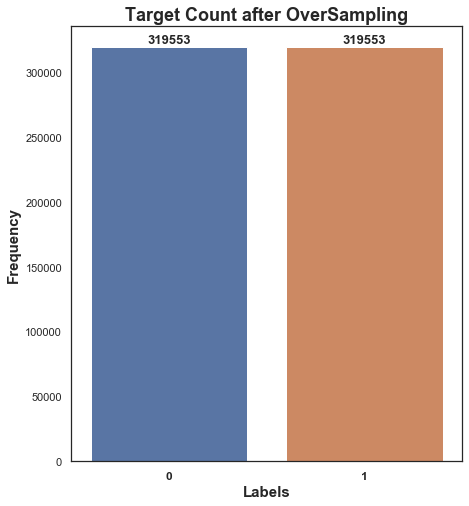

In [87]:
df_check = pd.concat([X_train_over,y_train_over],axis=1)
df1 = df_check.groupby(['Target']).count()['Sourcing_Channel'].reset_index()
df1.columns = ['Target','Count']
df1.head()
sns.set(style="white")


# membuat bar chart
plt.figure(figsize = (7, 8))
ax = sns.barplot(
    x = 'Target',
    y = 'Count',
    data = df1)
ax.set_xticklabels(['0','1'], fontsize = 12, fontweight = 'semibold')

# membuat judul dan merubah nama xlabel & ylabel
plt.title('Target Count after OverSampling', fontsize = 18, fontweight = 'bold')
plt.xlabel('Labels', fontsize = 15, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.0f'),
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points')

# undersampling

In [88]:
#Enter Code Here
final_train['Target'].value_counts()

0    319553
1     62601
Name: Target, dtype: int64

In [92]:
# Class count
count_class_0, count_class_1 = final_train['Target'].value_counts()

# Divide by class
df_class_0 = final_train[final_train['Target'] == 0]
df_class_1 = final_train[final_train['Target'] == 1]

In [93]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random UnderSampling:')
print(df_under['Target'].value_counts())

Random UnderSampling:
0    62601
1    62601
Name: Target, dtype: int64


C:\Users\Zaki\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


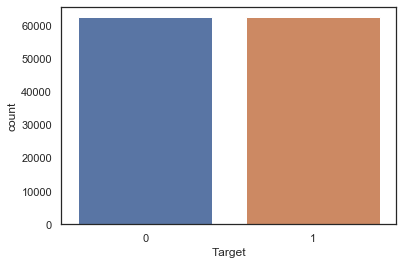

In [94]:
sns.countplot(df_under['Target'])

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

# biasa

In [66]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [67]:
param_grid =  {'n_estimators': [400,450,500,550],
                            'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}

rscv = RandomizedSearchCV(rfc,param_grid,scoring='accuracy',n_iter=20,cv=5)
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [68]:
rscv.best_params_

{'n_estimators': 450,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 15,
 'criterion': 'entropy',
 'bootstrap': True}

In [69]:
rscv.best_score_

0.8385415314141904

In [ ]:
show_feature_importance(rfc)

In [70]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators= 450,
 min_samples_split= 3,
 min_samples_leaf= 3,
 max_features= 'auto',
 max_depth= 15,
 criterion= 'entropy',
 bootstrap= True)
model_rfc.fit(X_train, y_train)
pred_rfc = model_rfc.predict(X_test)

# smote

In [64]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train_s, y_train_s)
pred_xgb = model_xgb.predict(X_test)

C:\Users\Zaki\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:28:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [65]:
#print("Accuracy on Traning set: ",model_rfc.score(X_train,y_train))
hasil_xgb = pd.DataFrame({
    'id' : final_test['id'],
    'Target' : pred_xgb
})

print(hasil_xgb.shape)

hasil_xgb['Target'].value_counts()

(78273, 2)


0    61678
1    16595
Name: Target, dtype: int64

In [66]:
hasil_xgb.to_csv('submission_xgb_smote.csv',index=False)

In [ ]:
subsample= 0.65,
 sampling_method= 'uniform',
 reg_lambda= 10,
 reg_alpha= 1,
 n_estimators= 550,
 min_child_weight= 0.01,
 max_depth= None,
 learning_rate= 0.5,
 gamma= 0.5,
 colsample_bytree= 0.75

In [152]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

C:\Users\Zaki\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [153]:
hasil_xgb = pd.DataFrame({
    'id' : final_test['id'],
    'Target' : pred_xgb
})

print(hasil_xgb.shape)

hasil_xgb['Target'].value_counts()

(78273, 2)


0    75070
1     3203
Name: Target, dtype: int64

In [154]:
hasil_xgb.to_csv('ok.csv',index=False)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=17)
model_knn.fit(X_train,y_train)
pred_knn = model_knn.predict(X_test)

In [64]:
hasil_knn = pd.DataFrame({
    'id' : final_test['id'],
    'Target' : pred_knn
})

print(hasil_knn.shape)

hasil_knn['Target'].value_counts()

(78273, 2)


0    76359
1     1914
Name: Target, dtype: int64

In [65]:
hasil_knn.to_csv('submissionknn.csv',index=False)

In [ ]:
#VALIDATION

In [72]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_rfc))
print(accuracy_score(y_test,pred_rfc))

In [ ]:
acc_random_forest = accuracy_score(y_test,pred_rfc)
acc_logistic_reg = accuracy_score(y_test,pred_logreg)
acc_SVC= accuracy_score(y_test,pred_svc)
acc_NBayes= accuracy_score(y_test,pred_nb)

models = pd.DataFrame({
    'Model': [ 'Random Forest', 'Logistic Regression','Support Vector Classifier','Naive bayes'],
    'Score': [acc_random_forest,acc_logistic_reg,acc_SVC,acc_NBayes]})
models.sort_values(by='Score', ascending=False)